**Taller Modulo 11 Aprendizaje Automático**

**Nombre:** Yibel Jasbleidy Morales Rey

CC 1013689724

In [30]:
!pip install sodapy

In [31]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sodapy import Socrata

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# **Actividad 1**

## Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia

Se escogió un Dataset sobre la clasificación del Sisbén en Hogares en el portal de datos públicos en Colombia [link del dataset 1](https://www.datos.gov.co/Estad-sticas-Nacionales/DNP-Sisb-n-Hogares/ab8a-uwf7)


In [33]:
#Dirección de la pagina
cliente=Socrata('www.datos.gov.co', None)
#Se agrega el identificador
result=cliente.get('ab8a-uwf7')
#Convertir los datos al dataframe
df_1=pd.DataFrame.from_records(result)
df_1.head()

,cod_mpio,zona,llave,corte,hogar,fex,hog001,hog002,hog003,hog004,...,hog018,hog019,hog020,hog021,hog022,hog023,hog024,hog025,hog026,hog027
0,05001,1,0001,SIV_2022,1,761.19639279,1,4,2,1,...,1,2,1,2,2,2,2,2,2,2
1,05001,2,0002,SIV_2022,1,23.954887218,3,3,2,2,...,1,1,2,2,2,2,2,2,2,4
2,05001,1,0003,SIV_2022,1,761.19639279,4,2,2,1,...,1,2,2,2,2,2,2,2,2,1
3,05001,1,0003,SIV_2022,2,761.19639279,3,2,2,1,...,2,1,2,2,2,2,2,2,2,2
4,05001,1,0004,SIV_2022,1,761.19639279,3,3,2,1,...,1,1,1,2,2,2,2,2,2,3


## Realice las tareas de limpieza necesarias

In [34]:
#Verificar los datos desde el data Set en información general
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cod_mpio  1000 non-null   object
 1   zona      1000 non-null   object
 2   llave     1000 non-null   object
 3   corte     1000 non-null   object
 4   hogar     1000 non-null   object
 5   fex       1000 non-null   object
 6   hog001    1000 non-null   object
 7   hog002    1000 non-null   object
 8   hog003    1000 non-null   object
 9   hog004    1000 non-null   object
 10  hog005    1000 non-null   object
 11  hog006    1000 non-null   object
 12  hog007    1000 non-null   object
 13  hog008    1000 non-null   object
 14  hog009    1000 non-null   object
 15  hog010    1000 non-null   object
 16  hog011    1000 non-null   object
 17  hog012    1000 non-null   object
 18  hog013    1000 non-null   object
 19  hog014    1000 non-null   object
 20  hog015    1000 non-null   object
 21  hog016    1000 

In [35]:
df_1.describe()

,cod_mpio,zona,llave,corte,hogar,fex,hog001,hog002,hog003,hog004,...,hog018,hog019,hog020,hog021,hog022,hog023,hog024,hog025,hog026,hog027
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1,2,963,1,4,2,5,10,8,4,...,2,2,2,2,2,1,2,2,2,10
top,05001,2,0020,SIV_2022,1,23.954887218,3,3,2,1,...,1,1,2,2,2,2,2,2,2,2
freq,1000,507,4,1000,962,507,412,349,398,761,...,881,557,639,952,971,1000,993,975,983,246


In [36]:
#Muestra toda la información
df_1

,cod_mpio,zona,llave,corte,hogar,fex,hog001,hog002,hog003,hog004,...,hog018,hog019,hog020,hog021,hog022,hog023,hog024,hog025,hog026,hog027
0,05001,1,0001,SIV_2022,1,761.19639279,1,4,2,1,...,1,2,1,2,2,2,2,2,2,2
1,05001,2,0002,SIV_2022,1,23.954887218,3,3,2,2,...,1,1,2,2,2,2,2,2,2,4
2,05001,1,0003,SIV_2022,1,761.19639279,4,2,2,1,...,1,2,2,2,2,2,2,2,2,1
3,05001,1,0003,SIV_2022,2,761.19639279,3,2,2,1,...,2,1,2,2,2,2,2,2,2,2
4,05001,1,0004,SIV_2022,1,761.19639279,3,3,2,1,...,1,1,1,2,2,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,05001,1,0976,SIV_2022,1,761.19639279,3,5,3,1,...,1,1,1,2,2,2,2,2,2,1
996,05001,1,0977,SIV_2022,1,761.19639279,3,3,2,1,...,1,1,1,2,2,2,2,2,2,3
997,05001,2,0978,SIV_2022,1,23.954887218,3,4,3,1,...,1,1,1,2,2,2,2,2,2,4
998,05001,2,0979,SIV_2022,1,23.954887218,3,2,2,1,...,1,2,2,2,2,2,2,2,2,2


In [37]:
#Se hace la clasificacion y transformación del Dataset
#Construir el dataframe tomando algunos datos
new_df=pd.DataFrame(df_1['zona'].astype(int).rename('Zona')) #Conversión de datos str a numericos
new_df['Miembros de la vivienda']=df_1['hog027'].astype(int)
new_df['Cantidad de cuartos de la vivienda']=df_1['hog002'].astype(int)
new_df['Incluyendo sala y comedor']=df_1['hog002'].astype(int)
new_df['Cuántos días llega el agua']=df_1['hog009'].astype(int)
new_df['¿El hogar tiene cocina?']=df_1['hog014'].astype(int)
new_df['¿El hogar posee nevera?']=df_1['hog018'].astype(int)
new_df['¿La vivienda se afectó por el evento inundación?']=df_1['hog021'].astype(int)

new_df.head()


,Zona,Miembros de la vivienda,Cantidad de cuartos de la vivienda,Incluyendo sala y comedor,Cuántos días llega el agua,¿El hogar tiene cocina?,¿El hogar posee nevera?,¿La vivienda se afectó por el evento inundación?
0,1,2,4,4,9,1,1,2
1,2,4,3,3,9,1,1,2
2,1,1,2,2,9,1,1,2
3,1,2,2,2,9,1,2,2
4,1,3,3,3,9,1,1,2


In [38]:
#Con la función info se verifica que están transformados los datos a entero
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Zona                                              1000 non-null   int64
 1   Miembros de la vivienda                           1000 non-null   int64
 2   Cantidad de cuartos de la vivienda                1000 non-null   int64
 3   Incluyendo sala y comedor                         1000 non-null   int64
 4   Cuántos días llega el agua                        1000 non-null   int64
 5   ¿El hogar tiene cocina?                           1000 non-null   int64
 6   ¿El hogar posee nevera?                           1000 non-null   int64
 7   ¿La vivienda se afectó por el evento inundación?  1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


In [39]:
#Se crean los arreglos de numpy
col1=pd.to_numeric(new_df['Zona'], errors='coerce')
col2=pd.to_numeric(new_df['Cantidad de cuartos de la vivienda'], errors='coerce')
col3=pd.to_numeric(new_df['Incluyendo sala y comedor'], errors='coerce')
col4=pd.to_numeric(new_df['Cuántos días llega el agua'], errors='coerce')
col5=pd.to_numeric(new_df['¿El hogar tiene cocina?'], errors='coerce')
col6=pd.to_numeric(new_df['¿El hogar posee nevera?'], errors='coerce')
col7=pd.to_numeric(new_df['¿La vivienda se afectó por el evento inundación?'], errors='coerce')
x1=np.array(col1)
x2=np.array(col2)
x3=np.array(col3)
x4=np.array(col4)
x5=np.array(col5)
x6=np.array(col6)
x7=np.array(col7)

In [40]:
#Se crea la matriz para los datos de entrada X
Salida=[]
for i in range(len(col1)):
    aux=[]
    aux.append(x1[i])
    aux.append(x2[i])
    aux.append(x3[i])
    aux.append(x4[i])
    aux.append(x5[i])
    aux.append(x6[i])
    aux.append(x7[i])
    Salida.append(aux)
X=np.array(Salida)
X

array([[1, 4, 4, ..., 1, 1, 2],
       [2, 3, 3, ..., 1, 1, 2],
       [1, 2, 2, ..., 1, 1, 2],
       ...,
       [2, 4, 4, ..., 1, 1, 2],
       [2, 2, 2, ..., 1, 1, 2],
       [2, 3, 3, ..., 1, 1, 2]])

In [41]:
#se crea la salida y, la cual es la cantidad de integrantes que hay en la vivienda
#Convertir los datos del data Frame a numpy
salida=pd.to_numeric(new_df['Miembros de la vivienda'], errors='coerce')
print(type(salida))
y=np.array(salida)
print(type(y))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [42]:
#Confirmar los valores de entrada y salida en la posición 0
print(X[0])
print('---------')
print(y[0])

[1 4 4 9 1 1 2]
---------
2


## Dividir el conjunto entre datos de entrenamiento y datos de prueba, los datos de prueba serán el 15% del dataset

In [43]:
##Dividir el data set en conjunto de datos de prueba y de entrenamaiento
#train entrenamiento y test prueba
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.15)  #15% datos de prueba


In [44]:
#Los Datos de prueba
print(X_test)
print('--------------------------')
print(y_test)

[[2 2 2 ... 1 2 2]
 [1 2 2 ... 1 1 2]
 [2 3 3 ... 1 1 2]
 ...
 [2 4 4 ... 1 1 2]
 [2 2 2 ... 1 1 2]
 [2 2 2 ... 1 1 2]]
--------------------------
[4 2 2 1 3 4 3 5 3 3 3 7 3 2 1 1 4 6 4 3 2 2 3 3 4 3 2 5 4 3 4 4 2 1 3 1 2
 3 4 2 3 3 4 4 2 2 2 2 5 5 3 4 2 3 5 3 4 2 2 3 7 3 1 2 5 3 4 3 3 4 1 2 1 4
 1 2 3 3 4 2 2 3 3 1 2 9 1 2 2 1 6 1 2 3 3 2 1 3 4 6 2 2 1 3 1 4 2 2 7 1 3
 3 2 2 1 3 4 2 3 1 1 5 1 3 2 4 5 3 2 2 3 2 3 3 2 3 4 6 3 5 4 3 3 2 4 2 2 1
 2 2]


In [45]:
#Los datos de entrenamiento
print(X_train)
print('--------------------------')
print(y_train)

[[1 1 1 ... 2 1 2]
 [1 2 2 ... 1 1 2]
 [1 2 2 ... 1 1 2]
 ...
 [1 4 4 ... 1 1 2]
 [1 3 3 ... 1 1 2]
 [1 4 4 ... 1 1 2]]
--------------------------
[ 4  1  3  2  3  4  1  1  3  3  1  1  2  2  3  3  1  5  3  2  2  3  2  5
  4  5  4  3  5  4  3  1  2  1  1  3  5  3  5  3 10  5  2  4  1  2  3  4
  3  5  1  2  2  6  4  1  2  3  3  1  1  1  3  4  1  2  3  4  4  5  4  8
  5  2  2  2  4  4  8  4  3  3  4  3  4  4  3  7  4  1  2  4  4  2  4  3
  2  2  2  2  1  4  3  2  1  6  1  3  5  2  3  1  3  3  3  8  2  1  4  3
  4  5  4  1  3  1  3  2  6  5  3  2  1  2  1  4  2  3  5  2  8  2  5  1
  3  1  1  1  1  2  2  3  5  4  4  3  1  6  5  7  7  2  6  5  1  1  4  2
  3  5  1  4  5  4  3  2  1  3  2  4  2  5  1  2  1  3  4  3  3  3  3  1
  4  3  3  3  3  4  3  2  2  3  1  2  2  2  2  2  2  5  2  2  1  4  2  1
  4  4  3  6  3  4  3  4  3  4  2  4  4  1  3  1  4  1  3  7  3  4  2  2
  5  3  3  4  3  4  7  1  3  1  2  5  4  6  2  1  1  2  1  4  2  3  3  2
  2  1  4  4  2  3  4  1  1  5  1  2  1  6  5  4  

## Aplicar el algoritmo de clasificación de los K vecinos más cercanos

In [46]:
#Modelo de clasificación
Knn=KNeighborsClassifier(n_neighbors=3)
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
#Revisar la metrica
Knn.score(X_test,y_test)

0.2

In [48]:
# Establecer las observaciones para los 7 criterios
observacion=[[1,3,3,5,1,2,1]]
print(observacion)
ob=np.array(observacion)
print(ob)
ob.reshape(1,-1)
print(ob)

[[1, 3, 3, 5, 1, 2, 1]]
[[1 3 3 5 1 2 1]]
[[1 3 3 5 1 2 1]]


In [49]:
#Predice los datos de prueba
Knn.predict(ob)


array([2])

**Nota:** Según las observaciones anexadas en el dataset [1,3,3,5,1,2,1] donde 1 pertenecen la persona en la zona 1,3 es la Cantidad de cuartos de la vivienda, 3 Si hay sala y comedor, 5 días llega el agua, 1 El hogar tiene cocina, 2 El hogar posee nevera, 1 el hogar fue afectado por la inundación.
El  modelo predictorio del Knn predice que hay 2 integrantes en la vivienda teniendo en cuenta los anteriores criterios.

In [50]:
#Se realiza el modelo. De clasificación o de agrupamiento
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.15)
#se imprime los datos
print(X_test)
print('--------------------------')
print(y_test)

[[1 2 2 ... 1 1 2]
 [2 1 1 ... 1 2 1]
 [1 3 3 ... 1 1 2]
 ...
 [2 2 2 ... 1 1 2]
 [1 3 3 ... 1 1 2]
 [2 3 3 ... 1 1 2]]
--------------------------
[2 2 3 2 5 4 5 4 4 2 3 5 6 3 6 3 5 2 3 5 6 4 1 3 4 3 2 2 1 4 2 3 1 3 4 1 4
 2 5 5 1 4 1 1 1 1 3 2 3 1 4 2 4 4 4 3 1 2 4 1 3 4 2 3 8 1 2 2 4 2 3 2 8 2
 4 4 3 1 3 2 3 4 3 1 2 4 3 1 2 2 2 4 1 3 1 3 6 2 3 4 3 5 4 6 2 1 4 2 4 4 3
 1 4 5 2 3 5 4 2 3 1 3 4 1 2 1 7 4 6 2 1 3 2 1 2 1 3 2 2 1 3 3 2 4 3 1 1 3
 3 2]


In [51]:
#Aplicar el algoritmo de clasificación de los K vecinos más cercanos
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=2, max_iter=500)
Kmeans.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=2)

## Calcular los puntajes de la clasificación

In [52]:
#Calcular los puntajes de la clasificación
objetivos_=Kmeans.fit_predict(X_test,y_test)
objetivos_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

In [53]:
#Puntaje del kmeans
Kmeans.score(X_test,y_test)

-281.3297598627788

In [54]:
#Puntajes modelo de entrenamiento y prueba
train_scores={}
test_scores={}
neighbors = np.arange(1,10)
for neighbor in neighbors:
  knn=KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train,y_train)
  train_scores[neighbor]=knn.score(X_train,y_train)
  test_scores[neighbor]=knn.score(X_test,y_test)

In [55]:
#Se imprimen los puntajes
print(train_scores)
print(test_scores)

{1: 0.2917647058823529, 2: 0.26823529411764707, 3: 0.3, 4: 0.2823529411764706, 5: 0.27294117647058824, 6: 0.29294117647058826, 7: 0.2811764705882353, 8: 0.2788235294117647, 9: 0.2952941176470588}
{1: 0.21333333333333335, 2: 0.2, 3: 0.25333333333333335, 4: 0.19333333333333333, 5: 0.19333333333333333, 6: 0.23333333333333334, 7: 0.23333333333333334, 8: 0.23333333333333334, 9: 0.23333333333333334}


In [56]:
#Se realiza la Matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Knn.predict(X_test))

array([[18,  6,  1,  4,  0,  0,  0,  0],
       [15, 11,  5,  5,  0,  0,  0,  0],
       [15, 10,  4,  6,  0,  0,  0,  0],
       [12, 10,  3,  6,  0,  0,  0,  0],
       [ 3,  2,  3,  2,  0,  0,  0,  0],
       [ 2,  2,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0,  0,  0]])

In [57]:
#Los datos de prueba
print(X_test)
print('--------------------------')
print(y_test)

[[1 2 2 ... 1 1 2]
 [2 1 1 ... 1 2 1]
 [1 3 3 ... 1 1 2]
 ...
 [2 2 2 ... 1 1 2]
 [1 3 3 ... 1 1 2]
 [2 3 3 ... 1 1 2]]
--------------------------
[2 2 3 2 5 4 5 4 4 2 3 5 6 3 6 3 5 2 3 5 6 4 1 3 4 3 2 2 1 4 2 3 1 3 4 1 4
 2 5 5 1 4 1 1 1 1 3 2 3 1 4 2 4 4 4 3 1 2 4 1 3 4 2 3 8 1 2 2 4 2 3 2 8 2
 4 4 3 1 3 2 3 4 3 1 2 4 3 1 2 2 2 4 1 3 1 3 6 2 3 4 3 5 4 6 2 1 4 2 4 4 3
 1 4 5 2 3 5 4 2 3 1 3 4 1 2 1 7 4 6 2 1 3 2 1 2 1 3 2 2 1 3 3 2 4 3 1 1 3
 3 2]


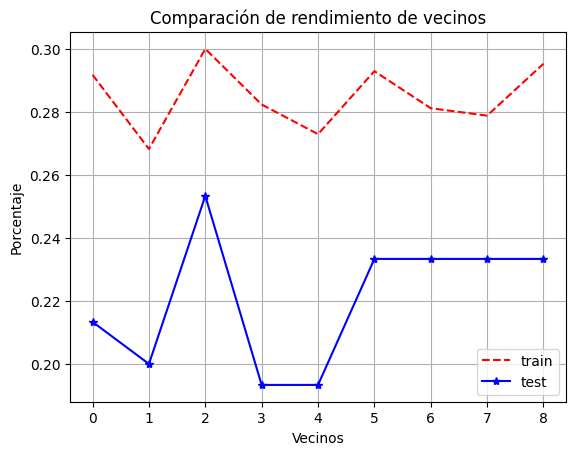

In [74]:
#Gráfica de los puntajes (score)

plt.plot(list(train_scores.values()),'r--',label='train')
plt.plot(list(test_scores.values()),'b*-',label='test')
plt.legend()
plt.xlabel('Vecinos')
plt.ylabel('Porcentaje')
plt.title('Comparación de rendimiento de vecinos')
plt.grid()
plt.show()

Teniendo en cuenta la gráfica de comparación del rendimiento de 10 vecinos,al imprimir los puntajes y graficarlos,Se evidencia que el modelo de entrenamiento tienen varios picos bajos y altos alcanzando un comportamiento maximo del 30%, en el modelo de prueba alcanzó un pico inferior de rendimiento a 10%.

En la linea azul (modelo de entrenamiento), el comportamiento es igual si se tienen 5,6,7,8 y 9 vecinos.

## Concluir si la clasificación fue buena o no

---



De acuerdo a la matriz de confusión la clasificación del número de integrantes de la vivienda del Sisben, el modelo arroja inconsistencias en la clasificación, dado que la matriz se encuentran 7 categorias del dataset, en la diagonal de la matriz los datos que se encuentran fuera de esta, no lo están clasificando correctamente.

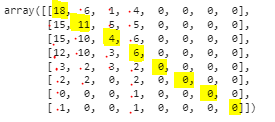

Por ejemplo:En la columna 2, fila 1 se encuentran 15 datos donde el modelo clasifica que 2 personas viven en un hogar cuando en realidad es una persona que viven en el hogar.

Los datos 0 representan la ausencia de los datos variables respuesta del 15% clasificado en el modelo de prueba.

# **Actividad 2**


## Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia

Se escogió un dataset sobre la **salud del sueño** en la página de Kaggle, donde determina si una persona presenta un desorden del sueño, teniendo en cuenta unos habitos o criterios de este dataset como la edad,género, duración del sueño, actividad fisica, nivel de éstres, el indice de masa corporal, latidos del corazón y los pasos que realiza una persona diariamente.

Las variables se asignaron de la siguiente forma:


*   Desorden del sueño [(0) No presenta desorden del sueño, (1) Apnea del sueño,(2) Insomio]

*   Género [0 es Masculino, 1 es Femenino]
* Categoria BMI [(0) es Normal, (2) sobrepeso, (3) obesidad]






[linkData2 en kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

[Dataset en excel ](https://docs.google.com/spreadsheets/d/1gAO4joVYElzgcy4rREPyMRjec4aVlf_N/edit?usp=sharing&ouid=101241509980101147413&rtpof=true&sd=true)

In [59]:
df3 = pd.read_excel('/content/Sleep_health_and_lifestyle_dataset.xlsx',sheet_name='Sleep_health_and_lifestyle_data')
df3

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,27,6.1,6,42,6,2,77,4200,0
1,2,0,28,6.2,6,60,8,0,75,10000,0
2,3,0,28,6.2,6,60,8,0,75,10000,0
3,4,0,28,5.9,4,30,8,3,85,3000,1
4,5,0,28,5.9,4,30,8,3,85,3000,1
...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,59,8.1,9,75,3,2,68,7000,1
370,371,1,59,8.0,9,75,3,2,68,7000,1
371,372,1,59,8.1,9,75,3,2,68,7000,1
372,373,1,59,8.1,9,75,3,2,68,7000,1


## Realice las tareas de limpieza necesarias

In [60]:
 # Muestra la información General del dataset, todos los datos están de forma numerica
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int64  
 2   Age                      374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 32.3 KB


In [61]:
#Se realiza la tranformación del dataset organizando las variables que se van a utilizar
new_df3=pd.DataFrame(df3['Gender'])
new_df3['Edad']=df3['Age']
new_df3['Duración del sueño']=df3['Sleep Duration']
new_df3['Calidad del sueño']=df3['Quality of Sleep']
new_df3['Nivel de actividad fisica']=df3['Physical Activity Level']
new_df3['Nivel de stress']=df3['Stress Level']
new_df3['BMI']=df3['BMI Category']
new_df3['Heart Rate']=df3['Heart Rate']
new_df3['Pasos diarios']=df3['Daily Steps']
new_df3['Desorden del sueño']=df3['Sleep Disorder']

new_df3

,Gender,Edad,Duración del sueño,Calidad del sueño,Nivel de actividad fisica,Nivel de stress,BMI,Heart Rate,Pasos diarios,Desorden del sueño
0,0,27,6.1,6,42,6,2,77,4200,0
1,0,28,6.2,6,60,8,0,75,10000,0
2,0,28,6.2,6,60,8,0,75,10000,0
3,0,28,5.9,4,30,8,3,85,3000,1
4,0,28,5.9,4,30,8,3,85,3000,1
...,...,...,...,...,...,...,...,...,...,...
369,1,59,8.1,9,75,3,2,68,7000,1
370,1,59,8.0,9,75,3,2,68,7000,1
371,1,59,8.1,9,75,3,2,68,7000,1
372,1,59,8.1,9,75,3,2,68,7000,1


In [62]:
#Se crean los datos de entrada X
dat1=pd.to_numeric(new_df3['Gender'], errors='coerce')
dat2=pd.to_numeric(new_df3['Edad'], errors='coerce')
dat3=pd.to_numeric(new_df3['Duración del sueño'], errors='coerce')
dat4=pd.to_numeric(new_df3['Calidad del sueño'], errors='coerce')
dat5=pd.to_numeric(new_df3['Nivel de actividad fisica'], errors='coerce')
dat6=pd.to_numeric(new_df3['Nivel de stress'], errors='coerce')
dat7=pd.to_numeric(new_df3['BMI'], errors='coerce')
dat8=pd.to_numeric(new_df3['Heart Rate'], errors='coerce')
dat9=pd.to_numeric(new_df3['Pasos diarios'], errors='coerce')
x1=np.array(dat1)
x2=np.array(dat2)
x3=np.array(dat3)
x4=np.array(dat4)
x5=np.array(dat5)
x6=np.array(dat6)
x7=np.array(dat7)
x8=np.array(dat8)
x9=np.array(dat9)

In [63]:
#Se crea la matriz para los datos de entrada en arreglo de numpy
Salida=[]
for i in range(len(dat1)):
    aux=[]
    aux.append(x1[i])
    aux.append(x2[i])
    aux.append(x3[i])
    aux.append(x4[i])
    aux.append(x5[i])
    aux.append(x6[i])
    aux.append(x7[i])
    aux.append(x8[i])
    aux.append(x9[i])
    Salida.append(aux)
X1=np.array(Salida)
#Se verifican los datos de entrada
X1

array([[0.0e+00, 2.7e+01, 6.1e+00, ..., 2.0e+00, 7.7e+01, 4.2e+03],
       [0.0e+00, 2.8e+01, 6.2e+00, ..., 0.0e+00, 7.5e+01, 1.0e+04],
       [0.0e+00, 2.8e+01, 6.2e+00, ..., 0.0e+00, 7.5e+01, 1.0e+04],
       ...,
       [1.0e+00, 5.9e+01, 8.1e+00, ..., 2.0e+00, 6.8e+01, 7.0e+03],
       [1.0e+00, 5.9e+01, 8.1e+00, ..., 2.0e+00, 6.8e+01, 7.0e+03],
       [1.0e+00, 5.9e+01, 8.1e+00, ..., 2.0e+00, 6.8e+01, 7.0e+03]])

In [64]:
#Se crea el dato de salida, la variable respuesta son los criterios del desorden del sueño
#Convertir los datos del data Frame a numpy
salida=pd.to_numeric(new_df3['Desorden del sueño'], errors='coerce')
print(type(salida))
y1=np.array(salida)
print(type(y1))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [65]:
#Se verifican los datos de salida
print(y1)

[0 0 0 1 1 2 2 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 2 1 2 0 1 1 1 1 1 1 1 1 1 1 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 1 1 1 2 2 2 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [66]:
#Importar datos
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

## Aplicar el algoritmo de agrupamiento de las K medias

In [67]:
#Aplicar el modelo de agrupamiento
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=4,max_iter=300)
Kmeans.fit(new_df3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [68]:
objetivos=Kmeans.fit_predict(new_df3)
print(objetivos)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 2 2 0 0 0 0 3 3 3 3 3 3 3 3 3 0 3 0 3 3 3 3 3 3 3 3 3 3 3 0 0 1 0 3 0 0
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 3 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 3 1
 3 1 3 1 1 1 1 1 1 1 1 1 1 1 3 3 1 3 3 1 3 3 1 3 3 1 3 1 3 1 3 1 1 3 0 3 0
 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 2 0 2 2 2 2 2 2 2 2 2 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 1 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


## Calcular los puntajes de la agrupación

In [69]:
#En total son 374 datos
print(type(objetivos))
print(len(objetivos))
arr_=objetivos
print(type(arr_))
print(len(arr_))

<class 'numpy.ndarray'>
374
<class 'numpy.ndarray'>
374


In [70]:
arr_o=np.sort(arr_)
print(arr_o)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]


## Representar gráficamente los grupos

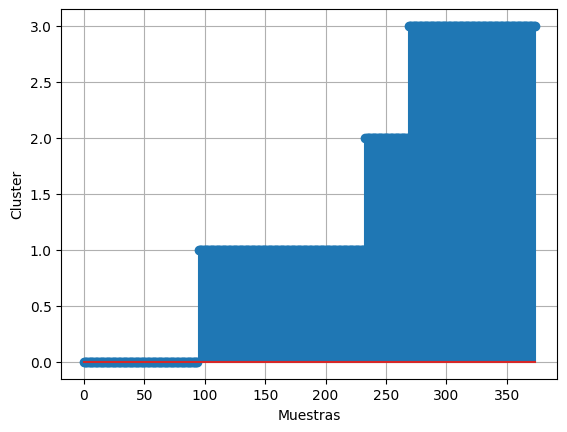

In [71]:
#Gráfica 1 para visualizar los datos de agrupación
plt.stem(arr_o)
plt.grid()
plt.xlabel('Muestras')
plt.ylabel('Cluster')
plt.show()

De acuerdo a la gráfica 1, se observa que se agrupó los 374 datos en 4 clusters,de 150 muestras de los datos de prueba de la base de datos los agrupó en 1 cluster.

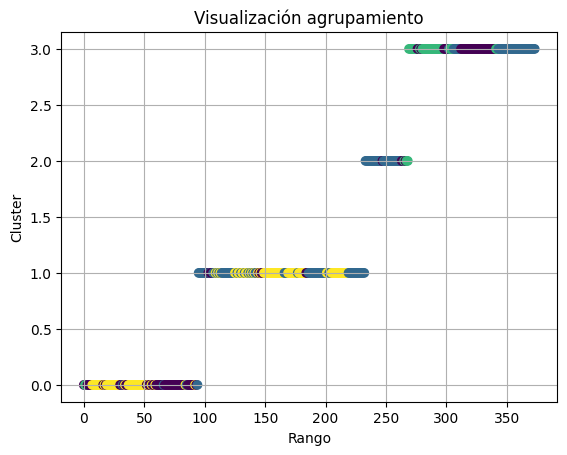

In [75]:
#Gráfica2
#Realizar una grafica de dos dimensiones para el agrupamiento
rango=range(0,len(arr_o))
plt.scatter(rango,arr_o,c=Kmeans.labels_)
plt.xlabel('Rango')
plt.ylabel('Cluster')
plt.title('Visualización agrupamiento')
plt.grid()
plt.show()

## Concluir si la agrupación fue buena o no

De acuerdo a la gráfica 2, se evidencia que el modelo fue bueno, puesto que el modelo agrupó los datos correctamente, están organizados en los 4 clusters establecidos, se pueden observar los 3 colores agrupados, los cuales definen las 3 categorias del indice de masa corporal(Normal,sobrepeso,obesidad) realizadas en la variable de respuesta (y). Se concluye que hubieron datos e información suficiente para que el modelo agrupará apropiadamente.
